In [191]:
import numpy as np
from numpy import matlib as ml
import pandas as pd
import os
import warnings
import librosa
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import seaborn as sns
from random import shuffle
import scipy.stats as st

from pynwb import NWBHDF5IO
from pynwb.image import ImageSeries
from pynwb.epoch import TimeIntervals

In [330]:
# ----- SET UP FILE HANDLING -----

computer = 'Dorian'

match computer:
    case 'Dorian':
        nwbpath = 'M:\\scn2a-paper-GWJSNH\\NWB-files'
        
    case 'Ernest':
        nwbpath = 'C:\\Users\\nhogl\\Documents\\GitHub\\scn2a-paper-GWJSNH-code\\NWB'

assay = 'PPT'
allnwb = []
allnwb += [os.path.join(nwbpath,each) for each in os.listdir(nwbpath) if assay in each]

figp=os.path.join('figures','2024July') # where to save figures

In [72]:
# ----- COLLATE PARTNER AND STRANGER HUDDLE DATA -----

FHet = 0
MHet = 0
FWT = 0
MWT = 0

for i,fname in enumerate(allnwb):
    # open file
    io = NWBHDF5IO(os.path.join(nwbpath,fname), mode="r") # <-- open in write to append snippets?
    nwbfile = io.read()
    
    # for sanity check, print out the name of the file being handled
    pathsplit = fname.split('\\')
    recstem = pathsplit[-1].strip('.nwb')
    print(recstem)
    
    # filter out files that don't have complete timelines
    
    # handle cases where there are no examples of the behavior
    try:
        partnerdf = nwbfile.intervals['single_behavior_Huddle Partner'].to_dataframe()
    except:
        print('No partner huddles')
        partnerdf = pd.DataFrame()
    try:
        strangerdf = nwbfile.intervals['single_behavior_Huddle Stranger'].to_dataframe()
    except:
        print('No stranger huddles')
        strangerdf = pd.DataFrame()
        
    # make new dataframe with start times, durations, and labels
    nrpartner = partnerdf.shape[0]
    masspartner = ['partner']*nrpartner
    combdf = pd.concat([partnerdf, strangerdf])    
    nrentries = combdf.shape[0]
    nrstranger = strangerdf.shape[0]
    massstranger = ['stranger']*nrstranger
    
    # get metadata information  
    pair_tag = fname.split('\\')[-1].split('_')[1] # label the pair the observation came from    
    massGT = [nwbfile.subject.genotype]*nrentries
    massPairtag = [pair_tag]*nrentries
    massSex = [nwbfile.subject.sex]*nrentries
    massLabel = masspartner+massstranger
    massColors = [nwbfile.lab_meta_data['vole_metadata'].colors[:]]*nrentries
    if np.logical_and(nwbfile.subject.genotype == 'Het', nwbfile.subject.sex=='F'): 
        massWithinGroup = [FHet]*nrentries
        FHet+=1
    elif np.logical_and(nwbfile.subject.genotype == 'WT', nwbfile.subject.sex=='F'): 
        massWithinGroup = [FWT]*nrentries
        FWT+=1
    elif np.logical_and(nwbfile.subject.genotype == 'Het', nwbfile.subject.sex=='M'):
        massWithinGroup = [MHet]*nrentries
        MHet+=1
    elif np.logical_and(nwbfile.subject.genotype == 'WT', nwbfile.subject.sex=='M'):
        massWithinGroup = [MWT]*nrentries
        MWT+=1
    nrcols = combdf.shape[1]
    
    # add columns
    combdf.insert(nrcols, 'pairtag', massPairtag, True)
    combdf.insert(nrcols+1, 'GT', massGT, True)
    combdf.insert(nrcols+2, 'sex', massSex, True)
    combdf.insert(nrcols+3, 'behavior_label', massLabel, True)
    combdf['pair'] = massWithinGroup
    combdf['color'] = massColors
    
    # consolidate into one big dataframe
    if i==0:
        rundf = combdf
    else:
        rundf = pd.concat([rundf,combdf])

Nov22_Pair15_PPT
Nov22_Pair16_PPT
Nov22_Pair17_PPT
Nov22_Pair18_PPT
Nov22_Pair19_PPT
Nov22_Pair1_PPT
No stranger huddles
Nov22_Pair21_PPT
Nov22_Pair22_PPT
Nov22_Pair23_PPT
Nov22_Pair24_PPT
Nov22_Pair25_PPT
Nov22_Pair26_PPT
Nov22_Pair27_PPT
Nov22_Pair28_PPT
Nov22_Pair29_PPT
Nov22_Pair2_PPT
Nov22_Pair30_PPT
No partner huddles
Nov22_Pair31_PPT
Nov22_Pair32_PPT
Nov22_Pair33_PPT
Nov22_Pair34_PPT
Nov22_Pair35_PPT
No stranger huddles
Nov22_Pair36_PPT
Nov22_Pair37_PPT
Nov22_Pair38_PPT
Nov22_Pair3_PPT
Nov22_Pair40_PPT
Nov22_Pair41_PPT
Nov22_Pair42_PPT
Nov22_Pair43_PPT
Nov22_Pair44_PPT
Nov22_Pair46_PPT
Nov22_Pair47_PPT
Nov22_Pair48_PPT
Nov22_Pair49_PPT
Nov22_Pair4_PPT
Nov22_Pair50_PPT
Nov22_Pair51_PPT
Nov22_Pair52_PPT
No stranger huddles
Nov22_Pair56_PPT
Nov22_Pair57_PPT
Nov22_Pair58_PPT
Nov22_Pair59_PPT
Nov22_Pair5_PPT
Nov22_Pair61_PPT
No stranger huddles
Nov22_Pair62_PPT
Nov22_Pair63_PPT
No stranger huddles
Nov22_Pair64_PPT
Nov22_Pair6_PPT
Nov22_Pair7_PPT
Nov22_Pair8_PPT


In [73]:
rundf.head()

,start_time,stop_time,behavior,duration,atype,pairtag,GT,sex,behavior_label,pair,color
id,,,,,,,,,,,
4,14.500,52.748,Huddle Partner,38.248,STATE,Pair15,Het,F,partner,0,"[245.0, 201.0, 39.0]"
8,55.249,80.496,Huddle Partner,25.247,STATE,Pair15,Het,F,partner,0,"[245.0, 201.0, 39.0]"
11,81.496,164.749,Huddle Partner,83.253,STATE,Pair15,Het,F,partner,0,"[245.0, 201.0, 39.0]"
43,245.497,245.497,Huddle Partner,0.001,STATE,Pair15,Het,F,partner,0,"[245.0, 201.0, 39.0]"
66,275.962,277.462,Huddle Partner,1.500,STATE,Pair15,Het,F,partner,0,"[245.0, 201.0, 39.0]"


In [104]:
rundf["SEXxGT"] = rundf['sex'].add(rundf['GT']) # add a column that maps the GT/sex 2x2 into 4 groups
zdf = rundf.duration.replace(0, 0.001)
rundf.duration = zdf
rundf['log10(dur)'] = np.log10(rundf['duration']) # add the log2 transform of durations
# add a label to separate pairtags in each group
# jcs = np.unique(rundf.joint_category)
# for i,jc in enumerate(jcs):
#     pts = rundf.pairtag[runtag.joint_category==jc]
#     for j,pt in enumerate(pts):
        
rundf.head()

,start_time,stop_time,behavior,duration,atype,pairtag,GT,sex,behavior_label,pair,color,SEXxGT,log2(dur),log10(dur)
id,,,,,,,,,,,,,,
4,14.500,52.748,Huddle Partner,38.248,STATE,Pair15,Het,F,partner,0,"[245.0, 201.0, 39.0]",FHet,5.257312,1.582609
8,55.249,80.496,Huddle Partner,25.247,STATE,Pair15,Het,F,partner,0,"[245.0, 201.0, 39.0]",FHet,4.658040,1.402210
11,81.496,164.749,Huddle Partner,83.253,STATE,Pair15,Het,F,partner,0,"[245.0, 201.0, 39.0]",FHet,6.379430,1.920400
43,245.497,245.497,Huddle Partner,0.001,STATE,Pair15,Het,F,partner,0,"[245.0, 201.0, 39.0]",FHet,-9.965784,-3.000000
66,275.962,277.462,Huddle Partner,1.500,STATE,Pair15,Het,F,partner,0,"[245.0, 201.0, 39.0]",FHet,0.584963,0.176091


In [327]:
# --- Make color palettes ---
col1 = rundf.color[np.logical_and(rundf.GT=='WT',rundf.sex=='F')].reset_index(drop=True)[0]/255
col2 = rundf.color[np.logical_and(rundf.GT=='Het',rundf.sex=='F')].reset_index(drop=True)[0]/255
col3 = rundf.color[np.logical_and(rundf.GT=='WT',rundf.sex=='M')].reset_index(drop=True)[0]/255
col4 = rundf.color[np.logical_and(rundf.GT=='Het',rundf.sex=='M')].reset_index(drop=True)[0]/255
fcols = [col1,col2]
mcols = [col3,col4] # match colors to groups
fpal = sns.color_palette(fcols)
mpal = sns.color_palette(mcols)
acols = [col1,col2,col3,col4]
apal = sns.color_palette(acols)

# Make a palette with stranger gray
psat = 150
scol = np.array([psat,psat,psat])/255
scollist = [scol]*4
fullpal = [val for pair in zip(acols, scollist) for val in pair]
fullp = sns.color_palette(fullpal)

# Parameters
plw = 0.75

# Fill in axes with stranger color
gcol = 225
axcol = np.array([gcol,gcol,gcol])/255

In [207]:
# --- Put a plotting color on each measurement ---
rundf['color'] = np.where(rundf['behavior_label']=='stranger',scolseries,rundf['color'])

In [208]:
rundf.color

id
4                                    [245.0, 201.0, 39.0]
8                                    [245.0, 201.0, 39.0]
11                                   [245.0, 201.0, 39.0]
43                                   [245.0, 201.0, 39.0]
66                                   [245.0, 201.0, 39.0]
                              ...                        
1593    [0.5882352941176471, 0.5882352941176471, 0.588...
1596    [0.5882352941176471, 0.5882352941176471, 0.588...
1624    [0.5882352941176471, 0.5882352941176471, 0.588...
1627    [0.5882352941176471, 0.5882352941176471, 0.588...
1631    [0.5882352941176471, 0.5882352941176471, 0.588...
Name: color, Length: 6989, dtype: object

In [206]:
scolseries

0       [0.5882352941176471, 0.5882352941176471, 0.588...
1       [0.5882352941176471, 0.5882352941176471, 0.588...
2       [0.5882352941176471, 0.5882352941176471, 0.588...
3       [0.5882352941176471, 0.5882352941176471, 0.588...
4       [0.5882352941176471, 0.5882352941176471, 0.588...
                              ...                        
6984    [0.5882352941176471, 0.5882352941176471, 0.588...
6985    [0.5882352941176471, 0.5882352941176471, 0.588...
6986    [0.5882352941176471, 0.5882352941176471, 0.588...
6987    [0.5882352941176471, 0.5882352941176471, 0.588...
6988    [0.5882352941176471, 0.5882352941176471, 0.588...
Length: 6989, dtype: object

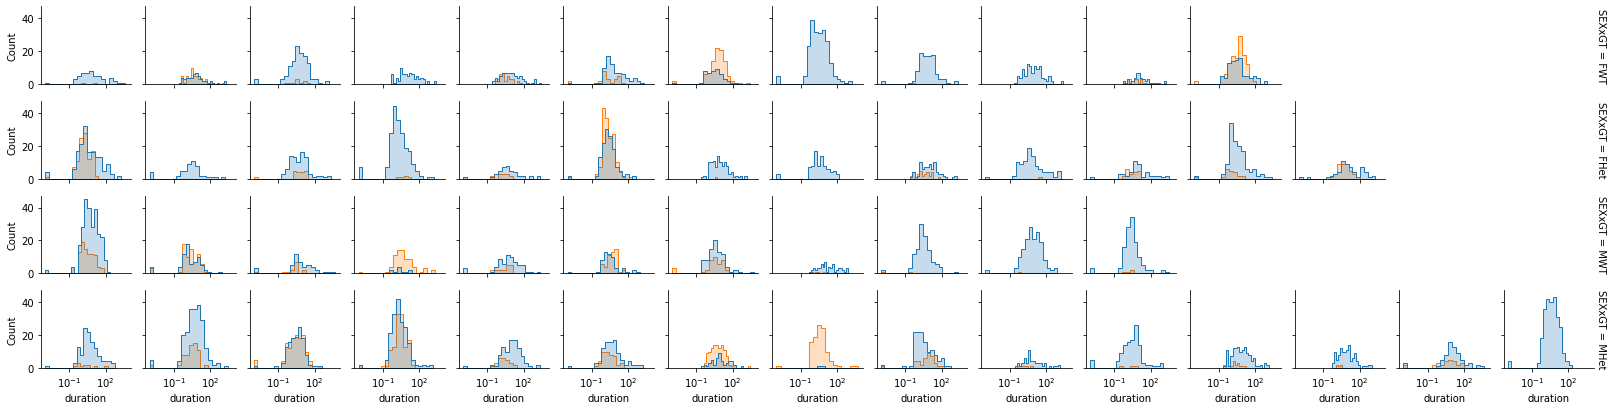

In [96]:
# ----- PLOT HISTOGRAMS FOR EACH INDIVIDUAL -----
g = sns.FacetGrid(rundf, row='SEXxGT',col='pair',height=1.5,margin_titles=True,
                  row_order=['FWT','FHet','MWT','MHet'])
g.map_dataframe(sns.histplot, x='duration', hue='behavior_label',bins=20,element='step',fill=True,log_scale=(True, False))
for (i,j,k), data in g.facet_data(): # hide empty axes
    if data.empty:
        ax = g.facet_axis(i, j)
        ax.set_axis_off()
# g.axes[0,0].set_title('')
for ax in g.axes[0]: # turn off pointless column labels
    ax.set_title('')
# change colors

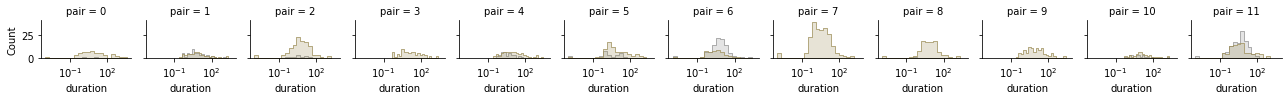

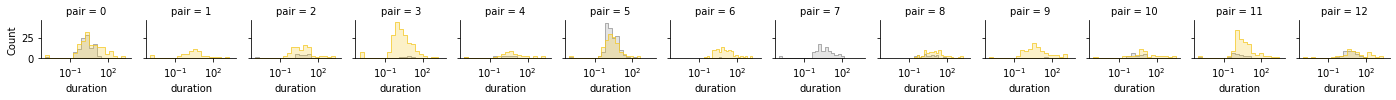

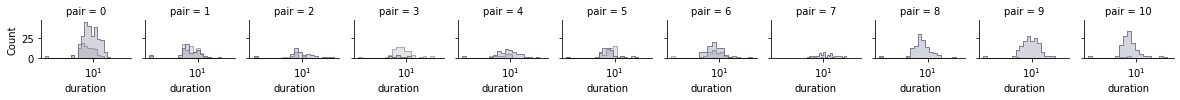

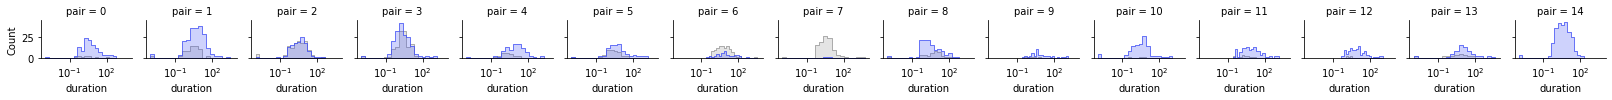

In [103]:
row_order = ['FWT','FHet','MWT','MHet']
for i,label in enumerate(row_order):
    pcol = acols[i]
    palette = {"partner":pcol,
           "stranger":scol,}
    g = sns.FacetGrid(rundf[rundf.SEXxGT==label], col='pair',margin_titles=True,height=1.5)
    g.map_dataframe(sns.histplot, x='duration', hue='behavior_label',bins=20,element='step',
                    fill=True,log_scale=(True, False),palette=palette, linewidth=plw)    

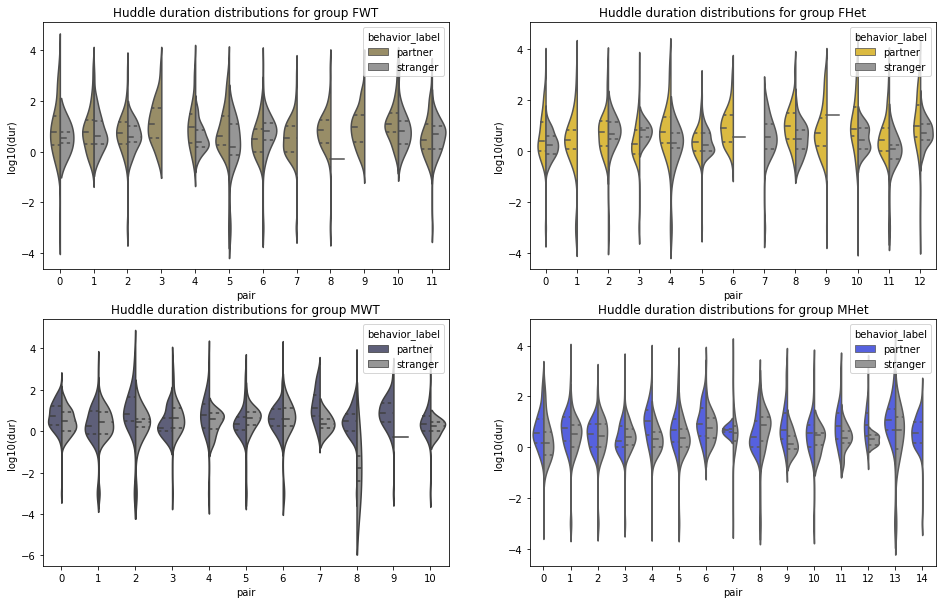

In [304]:
# ----- Plot duration distributions in split violin plots -----

row_order = ['FWT','FHet','MWT','MHet']
nrows=2
ncols=2
f, ax = plt.subplots(nrows,ncols,figsize=(16, 10))
saveplots=True

for i,label in enumerate(row_order):
    pcol = acols[i]
    palette = {"partner":pcol,
           "stranger":scol,}
    if label[0]=='F':
        r=0
    else:
        r=1
    if label[1:]=='WT':
        c=0
    else:
        c=1
    sns.violinplot(data=rundf[rundf.SEXxGT==label], x="pair", y="log10(dur)", hue="behavior_label",
               split=True, inner="quart", fill=False,
               palette=palette,ax=ax[r][c]).set(title=f'Huddle duration distributions for group {label}')
    
if saveplots:
    plt.savefig(os.path.join(figp,'PPT_all-huddle-duration-distributions.pdf'))

In [158]:
# ----- Combine all durations within an experimental group -----

# --- Normalize ---
# find totals
tots = rundf.groupby(['sex', 'GT','pair'])['duration'].apply(np.sum)
tots.name = 'total_huddle_time'
rundf = rundf.join(tots, on=['sex', 'GT','pair'])
# add normalized values to table
rundf['norm_duration'] = rundf.duration/rundf.total_huddle_time 

ValueError: columns overlap but no suffix specified: Index(['total_huddle_time'], dtype='object')

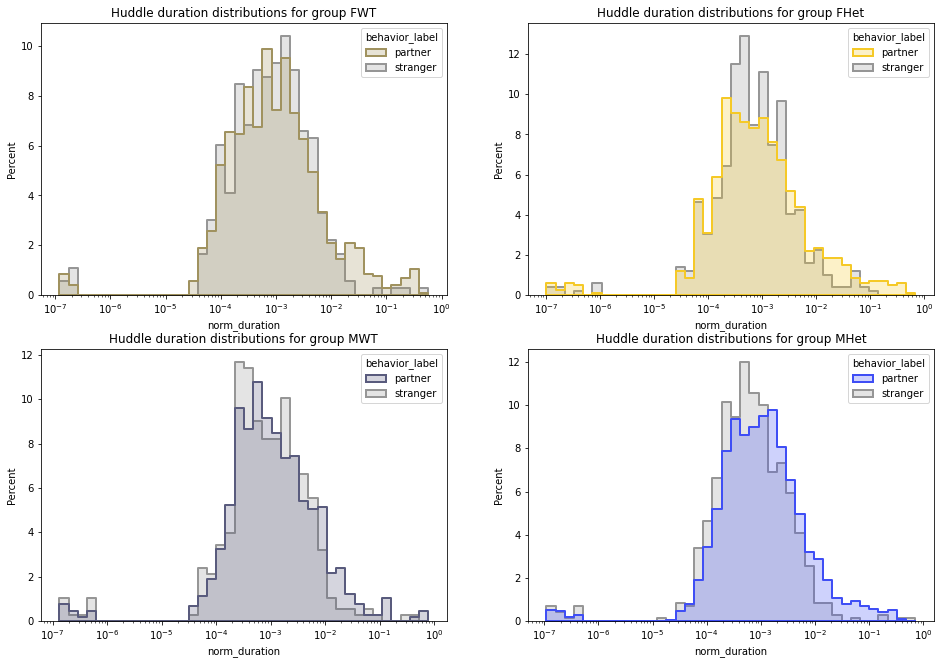

In [305]:
# --- Plot with internal norm ---
nbins=40

row_order = ['FWT','FHet','MWT','MHet']
nrows=2
ncols=2
f, ax = plt.subplots(nrows,ncols,figsize=(16, 11))

for i,label in enumerate(row_order):
    pcol = acols[i]
    palette = {"partner":pcol,
           "stranger":scol,}
    if label[0]=='F':
        r=0
    else:
        r=1
    if label[1:]=='WT':
        c=0
    else:
        c=1
    sns.histplot(data=rundf[rundf.SEXxGT==label],x='norm_duration',bins=nbins,element='step',stat='percent',
                common_norm=False,fill=True,log_scale=(True, False),hue='behavior_label', 
                linewidth=2,palette=palette,ax=ax[r][c]).set(title=f'Huddle duration distributions for group {label}') 
    
if saveplots:
    plt.savefig(os.path.join(figp,'PPT_combined-huddle-duration-distributions-withingroupnorm-byExperimentalGroup.pdf'))

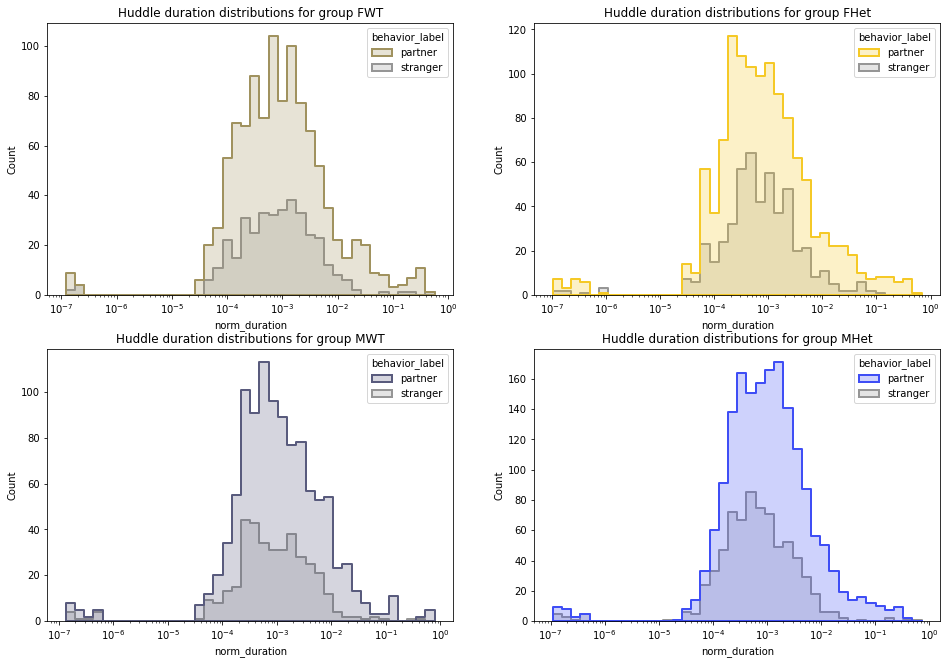

In [306]:
# --- Plot without internal norm ---
nbins=40

row_order = ['FWT','FHet','MWT','MHet']
nrows=2
ncols=2
f, ax = plt.subplots(nrows,ncols,figsize=(16, 11))

for i,label in enumerate(row_order):
    pcol = acols[i]
    palette = {"partner":pcol,
           "stranger":scol,}
    if label[0]=='F':
        r=0
    else:
        r=1
    if label[1:]=='WT':
        c=0
    else:
        c=1
    sns.histplot(data=rundf[rundf.SEXxGT==label],x='norm_duration',bins=nbins,element='step',fill=True,
                 log_scale=(True, False),hue='behavior_label', 
                linewidth=2,palette=palette,ax=ax[r][c]).set(title=f'Huddle duration distributions for group {label}')
    
if saveplots:
    plt.savefig(os.path.join(figp,'PPT_combined-huddle-duration-distributions-counts-byExperimentalGroup.pdf'))

In [331]:
figp

'figures\\2024July'

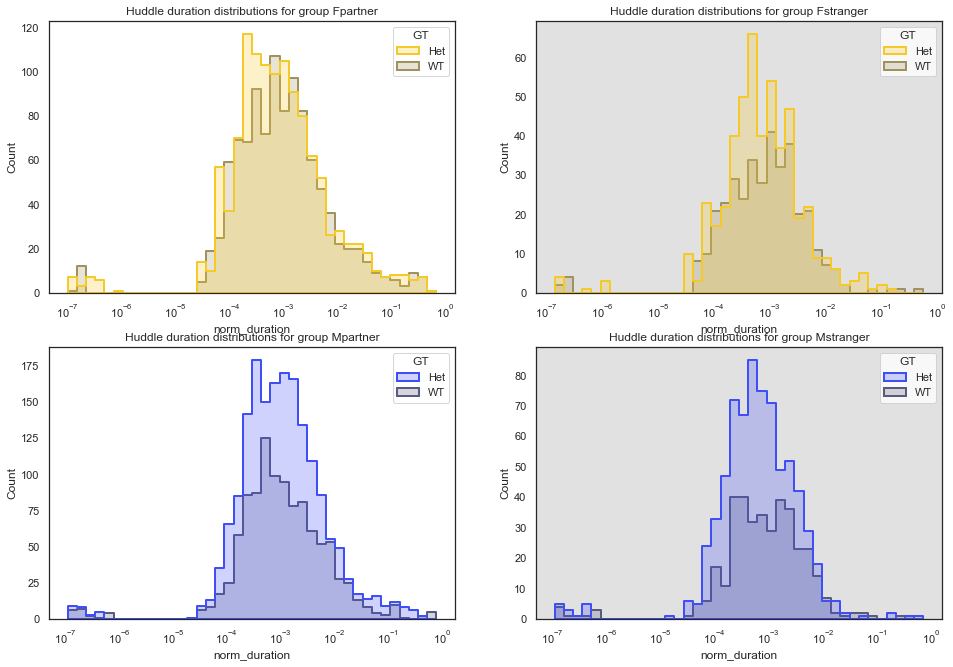

In [332]:
# ----- Plot distributions GT v GT -----

# rundf["SEXxBEHAV"] = rundf['sex'].add(rundf['behavior_label']) # add a column that maps the GT/sex 2x2 into 4 groups

row_order = ['Fpartner','Fstranger','Mpartner','Mstranger']
nrows=2
ncols=2
f, ax = plt.subplots(nrows,ncols,figsize=(16, 11))

for i,label in enumerate(row_order):
    if label[0]=='F':
        wcol = col1
        hcol = col2
        r=0
    else:
        wcol = col3
        hcol = col4
        r=1
    if label[1:]=='partner':
        c=0
    else:
        c=1
        ax[r,c].set_facecolor(axcol)

    pcol = acols[i]
    palette = {"WT":wcol,
           "Het":hcol,}
    sns.histplot(data=rundf[rundf.SEXxBEHAV==label],x='norm_duration',bins=nbins,element='step',fill=True,
                 log_scale=(True, False),hue='GT', 
                linewidth=2,palette=palette,ax=ax[r][c]).set(title=f'Huddle duration distributions for group {label}') 
    
if saveplots:
    plt.savefig(os.path.join(figp,'PPT_combined-huddle-duration-distributions-counts-byBehavior.pdf'))

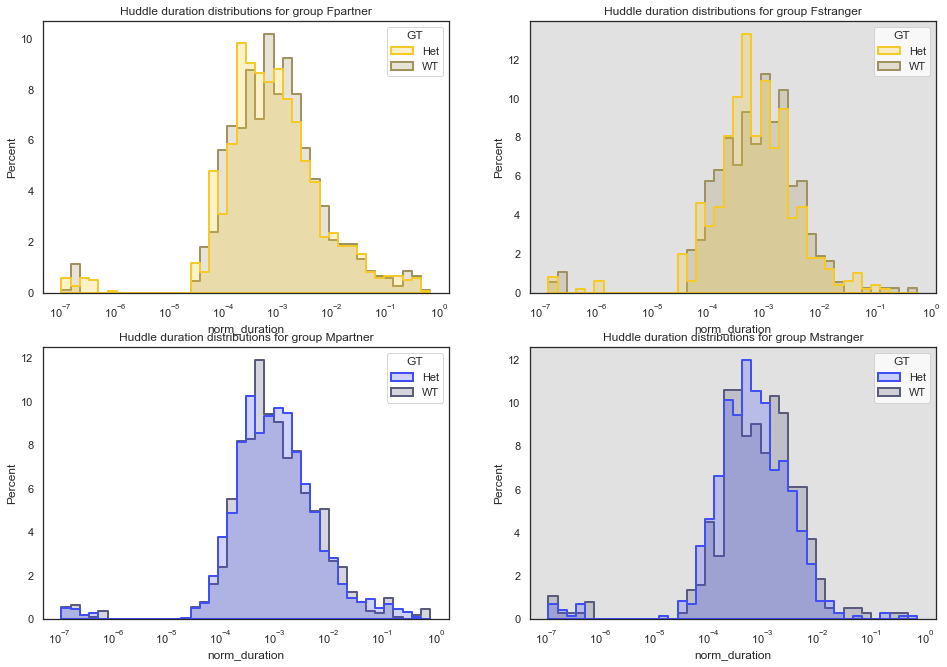

In [333]:
# ----- Plot distributions GT v GT -----

# rundf["SEXxBEHAV"] = rundf['sex'].add(rundf['behavior_label']) # add a column that maps the GT/sex 2x2 into 4 groups

row_order = ['Fpartner','Fstranger','Mpartner','Mstranger']
nrows=2
ncols=2
f, ax = plt.subplots(nrows,ncols,figsize=(16, 11))

for i,label in enumerate(row_order):
    if label[0]=='F':
        wcol = col1
        hcol = col2
        r=0
    else:
        wcol = col3
        hcol = col4
        r=1
    if label[1:]=='partner':
        c=0
    else:
        c=1
        ax[r,c].set_facecolor(axcol)
        
    pcol = acols[i]
    palette = {"WT":wcol,
           "Het":hcol,}
    sns.histplot(data=rundf[rundf.SEXxBEHAV==label],x='norm_duration',bins=nbins,element='step',fill=True,
                 log_scale=(True, False),hue='GT', stat='percent',common_norm=False,
                linewidth=2,palette=palette,ax=ax[r][c]).set(title=f'Huddle duration distributions for group {label}') 
if saveplots:
    plt.savefig(os.path.join(figp,'PPT_combined-huddle-duration-distributions-withingroupnorm-byBehavior.pdf'))

In [262]:
rundf["SEXxBEHAV"] = rundf['sex'].add(rundf['behavior_label']) # add a column that maps the GT/sex 2x2 into 4 groups
rundf

,start_time,stop_time,behavior,duration,atype,pairtag,GT,sex,behavior_label,pair,color,SEXxGT,log2(dur),log10(dur),total_huddle_time,norm_duration,SEXxBEHAV
id,,,,,,,,,,,,,,,,,
4,14.500,52.748,Huddle Partner,38.248,STATE,Pair15,Het,F,partner,0,"[245.0, 201.0, 39.0]",FHet,5.257312,1.582609,7250.037,5.275559e-03,Fpartner
8,55.249,80.496,Huddle Partner,25.247,STATE,Pair15,Het,F,partner,0,"[245.0, 201.0, 39.0]",FHet,4.658040,1.402210,7250.037,3.482327e-03,Fpartner
11,81.496,164.749,Huddle Partner,83.253,STATE,Pair15,Het,F,partner,0,"[245.0, 201.0, 39.0]",FHet,6.379430,1.920400,7250.037,1.148311e-02,Fpartner
43,245.497,245.497,Huddle Partner,0.001,STATE,Pair15,Het,F,partner,0,"[245.0, 201.0, 39.0]",FHet,-9.965784,-3.000000,7250.037,1.379303e-07,Fpartner
66,275.962,277.462,Huddle Partner,1.500,STATE,Pair15,Het,F,partner,0,"[245.0, 201.0, 39.0]",FHet,0.584963,0.176091,7250.037,2.068955e-04,Fpartner
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1593,9309.695,9312.254,Huddle Stranger,2.559,STATE,Pair8,WT,F,stranger,11,"[0.5882352941176471, 0.5882352941176471, 0.588...",FWT,1.355580,0.408070,4802.553,5.328416e-04,Fstranger
1596,9314.559,9324.798,Huddle Stranger,10.239,STATE,Pair8,WT,F,stranger,11,"[0.5882352941176471, 0.5882352941176471, 0.588...",FWT,3.356003,1.010258,4802.553,2.131991e-03,Fstranger
1624,9624.276,9625.551,Huddle Stranger,1.275,STATE,Pair8,WT,F,stranger,11,"[0.5882352941176471, 0.5882352941176471, 0.588...",FWT,0.350497,0.105510,4802.553,2.654838e-04,Fstranger


In [230]:
# ----- Per individual median huddle durations -----
meds = rundf.groupby(['sex', 'GT','pair','behavior_label'])['log10(dur)'].apply(np.median).reset_index(name='median')
meds["SEXxGT"] = meds['sex'].add(meds['GT']) # add a column that maps the GT/sex 2x2 into 4 groups

In [ ]:
fdat = meds[meds.sex=='F']
sns.boxplot(fdat, x="behavior_label", y="median", hue='behavior_label', dodge=True)
sns.lineplot(fdat,x='behavior_label',y='median',hue='GT',units="pair", estimator=None,marker="o",mew=0,
             palette=fpal,hue_order=['WT','Het'])

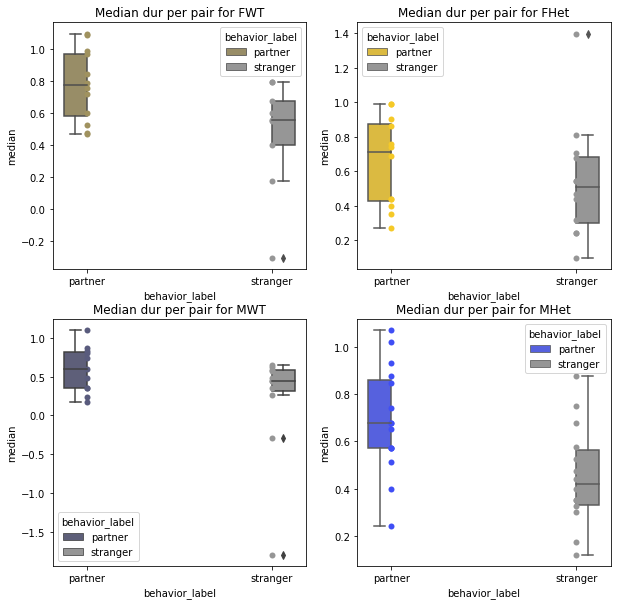

In [309]:
# ----- Boxplots of by-pair medians, partner v stranger -----

row_order = ['FWT','FHet','MWT','MHet']
nrows=2
ncols=2
f, ax = plt.subplots(nrows,ncols,figsize=(10, 10))

for i,label in enumerate(row_order):
    pcol = acols[i]
    palette = {"partner":pcol,
           "stranger":scol,}
    if label[0]=='F':
        r=0
    else:
        r=1
    if label[1:]=='WT':
        c=0
    else:
        c=1
    sns.boxplot(meds[meds.SEXxGT==label], x="behavior_label", y="median", hue='behavior_label', dodge=True,
                ax=ax[r][c],palette=palette,width=0.25)
    sns.lineplot(meds[meds.SEXxGT==label],x='behavior_label',y='median',hue='behavior_label',units="pair", 
                 estimator=None,marker="o",mew=0,palette=palette,ax=ax[r][c],
# ----- Boxplots of by-pair medians, partner v stranger -----
                 legend=False).set(title=f'Median dur per pair for {label}')
    
if saveplots:
    plt.savefig(os.path.join(figp,'PPT_byPair-huddle-duration-medians-byExperimentalGroup.pdf'))

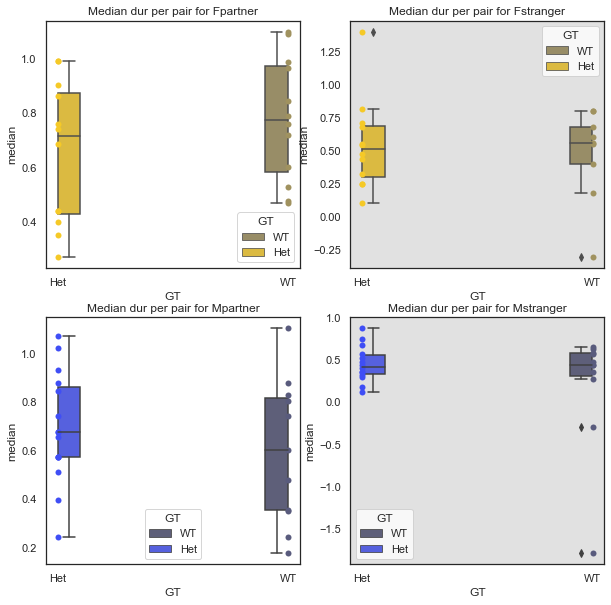

In [334]:
# ----- Boxplots of by-pair medians, WT v het -----

# meds["SEXxBEHAV"] = meds['sex'].add(meds['behavior_label']) 

row_order = ['Fpartner','Fstranger','Mpartner','Mstranger']
ho = ['WT','Het']
nrows=2
ncols=2
f, ax = plt.subplots(nrows,ncols,figsize=(10, 10))

for i,label in enumerate(row_order):
    if label[0]=='F':
        wcol = col1
        hcol = col2
        r=0
    else:
        wcol = col3
        hcol = col4
        r=1
    if label[1:]=='partner':
        c=0
    else:
        c=1
        ax[r,c].set_facecolor(axcol)

        
    pcol = acols[i]
    palette = {"WT":wcol,
           "Het":hcol,}
    sns.boxplot(meds[meds.SEXxBEHAV==label], x="GT", y="median", hue='GT', dodge=True,
                ax=ax[r][c],palette=palette,width=0.2,hue_order=ho)
    sns.lineplot(meds[meds.SEXxBEHAV==label],x='GT',y='median',hue='GT',units="pair", 
                 estimator=None,marker="o",mew=0,palette=palette,ax=ax[r][c],hue_order=ho,
                 legend=False).set(title=f'Median dur per pair for {label}')
    
if saveplots:
    plt.savefig(os.path.join(figp,'PPT_byPair-huddle-duration-medians-byBehavior.pdf'))

In [300]:
# ----- Per individual counts and total time -----
counts = rundf.groupby(['sex', 'GT','pair','behavior_label'])['duration'].count().reset_index(name='counts')
counts["SEXxGT"] = counts['sex'].add(counts['GT']) # add a column that maps the GT/sex 2x2 into 4 groups
totaldur = rundf.groupby(['sex', 'GT','pair','behavior_label'])['duration'].apply(np.sum).reset_index(name='total_dur')
totaldur["SEXxGT"] = totaldur['sex'].add(totaldur['GT']) # add a column that maps the GT/sex 2x2 into 4 groups

In [284]:
def strip_plots_with_medians(datatab,sex,plotvar,huevar,sz,alpha,edgecolor,ptborder,palette,hueorder,mw,zorder,ylabel,ax,f):
    
    spec = dict(x=huevar, y=plotvar, data=datatab[datatab.sex==sex],hue=huevar)
    
    sns.stripplot(**spec,s=sz,
                  alpha=alpha,
                  legend=False,
                  ax=ax,
                  edgecolor=edgecolor,
                  linewidth=ptborder,
                  palette=palette,
                  hue_order=hue_order,
                  order=hue_order)

    medtab = datatab[datatab.sex==sex].groupby(huevar, sort=False)[plotvar].median().reindex(hueorder)
    _ = [ax.hlines(y, i-mw, i+mw, zorder=zorder,colors=[0,0,0],linewidths=lw) for i, y in medtab.reset_index()[plotvar].items()]

    # make axes look nice
    ax.set(xlabel="")
    ax.set(ylabel=ylabel)
    sns.despine(fig=f, ax=ax, top=True, right=True, left=False, bottom=True, offset=None, trim=False)
    ax.tick_params(axis='x',length=0)

MannwhitneyuResult(statistic=62.5, pvalue=0.31101802177702276)


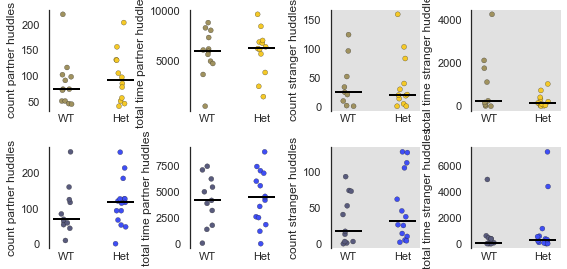

In [335]:
sz=5 # dot size for strip plots
alpha=1 # dot transparency for strip plots
medianwidth=0.5 # width on x axis of median bands
mw = medianwidth/2 # convert to halfwidth for plotting
lw = 2 # weight of median band lines
hue_order = ['WT','Het'] # how groups should be arranged on x axis
csz = 0.25
ptc='k'
plw=0.25
zorder=5
nrows = 2
ncols = 4
sns.set_theme(style='white')
f, ax = plt.subplots(nrows,ncols,figsize=(8, 4))
f.tight_layout()

strip_plots_with_medians(counts[counts.behavior_label=='partner'],'F','counts','GT',sz,alpha,ptc,plw,fpal,
                         hue_order,mw,zorder,'count partner huddles',ax[0,0],f)
strip_plots_with_medians(totaldur[totaldur.behavior_label=='partner'],'F','total_dur','GT',sz,alpha,ptc,plw,fpal,
                         hue_order,mw,zorder,'total time partner huddles',ax[0,1],f)
strip_plots_with_medians(counts[counts.behavior_label=='stranger'],'F','counts','GT',sz,alpha,ptc,plw,fpal,
                         hue_order,mw,zorder,'count stranger huddles',ax[0,2],f)
strip_plots_with_medians(totaldur[totaldur.behavior_label=='stranger'],'F','total_dur','GT',sz,alpha,ptc,plw,fpal,
                         hue_order,mw,zorder,'total time stranger huddles',ax[0,3],f)

strip_plots_with_medians(counts[counts.behavior_label=='partner'],'M','counts','GT',sz,alpha,ptc,plw,mpal,
                         hue_order,mw,zorder,'count partner huddles',ax[1,0],f)
strip_plots_with_medians(totaldur[totaldur.behavior_label=='partner'],'M','total_dur','GT',sz,alpha,ptc,plw,mpal,
                         hue_order,mw,zorder,'total time partner huddles',ax[1,1],f)
strip_plots_with_medians(counts[counts.behavior_label=='stranger'],'M','counts','GT',sz,alpha,ptc,plw,mpal,
                         hue_order,mw,zorder,'count stranger huddles',ax[1,2],f)
strip_plots_with_medians(totaldur[totaldur.behavior_label=='stranger'],'M','total_dur','GT',sz,alpha,ptc,plw,mpal,
                         hue_order,mw,zorder,'total time stranger huddles',ax[1,3],f)

ax[0,2].set_facecolor(axcol)
ax[0,3].set_facecolor(axcol)
ax[1,2].set_facecolor(axcol)
ax[1,3].set_facecolor(axcol)

countsM = counts[counts.sex=='M']
phudM = st.mannwhitneyu(countsM.counts[np.logical_and(countsM.behavior_label=='partner',countsM.GT=='WT')],countsM.counts[np.logical_and(countsM.behavior_label=='partner',countsM.GT=='Het')])
print(phudM)

if saveplots:
    plt.savefig(os.path.join(figp,'PPT_byPair-huddle-counts-timeTotals-byBehavior.pdf'))

In [315]:
rcParams.keys()

NameError: name 'rcParams' is not defined

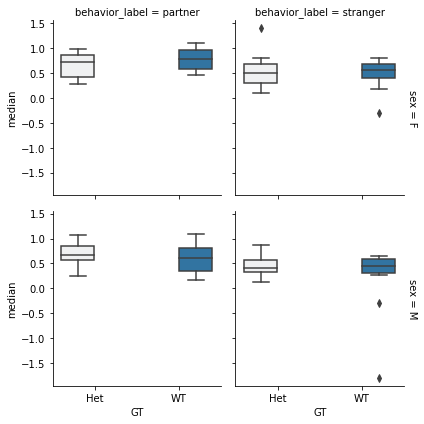

In [255]:
# ----- Compare partner v partner and stranger v stranger per exp group -----
# meds["GRPxBEHAV"] = meds['SEXxGT'].add(meds['behavior_label'])

g = sns.FacetGrid(meds, col='behavior_label',row='sex',margin_titles=True)
g.map_dataframe(sns.boxplot, x='GT', y='median',hue='GT')    

<AxesSubplot: xlabel='behavior_label', ylabel='median'>

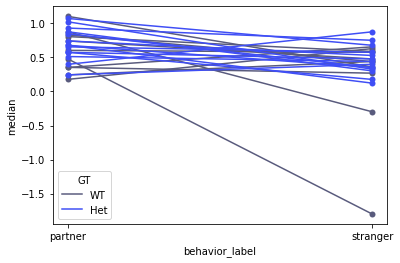

In [137]:
mdat = meds[meds.sex=='M']
sns.lineplot(mdat,x='behavior_label',y='median',hue='GT',units="pair", estimator=None,marker="o",mew=0,
             palette=mpal,hue_order=['WT','Het'])

In [231]:
meds

,sex,GT,pair,behavior_label,median,SEXxGT
0,F,Het,0,partner,0.398461,FHet
1,F,Het,0,stranger,0.243286,FHet
2,F,Het,1,partner,0.439017,FHet
3,F,Het,2,partner,0.740165,FHet
4,F,Het,2,stranger,0.676602,FHet
...,...,...,...,...,...,...
91,M,WT,8,stranger,-1.797583,MWT
92,M,WT,9,partner,0.874790,MWT
93,M,WT,9,stranger,-0.298432,MWT
94,M,WT,10,partner,0.352761,MWT


In [ ]:
sns.pointplot(rundf[rundf.sex=='F'],x='behavior_label',y='log10(dur)',)

In [ ]:
sns.violinplot(data=meds, x="day", y="total_bill", hue="smoker",
               split=True, inner="quart", fill=False,
               palette={"Yes": "g", "No": ".35"})

In [114]:
meds

,sex,GT,pair,behavior_label,median
0,F,Het,0,partner,0.398461
1,F,Het,0,stranger,0.243286
2,F,Het,1,partner,0.439017
3,F,Het,2,partner,0.740165
4,F,Het,2,stranger,0.676602
...,...,...,...,...,...
91,M,WT,8,stranger,-1.797583
92,M,WT,9,partner,0.874790
93,M,WT,9,stranger,-0.298432
94,M,WT,10,partner,0.352761


In [71]:
nwbfile

,start_time,stop_time,behavior,duration,atype
id,,,,,
0,21.433,21.433,Start assay,NaN,POINT
1,21.434,22.327,Center,0.893,STATE
2,22.328,28.215,Right,5.887,STATE
3,28.216,29.750,Interact Right,1.534,STATE
,start_time,stop_time,behavior,duration,atype
id,,,,,
1587,9296.381,9296.381,Attack Left,NaN,POINT
,start_time,stop_time,behavior,duration,atype
id,,,,,
